# Fashion Mnist, Random Forest, Hyper-parameter Tuning with Randomized Search

In [3]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

### How ML Models Work

Generally simple ml models do one-shot training, ***model.fit()*** is a one time process rather than iterative effort, like in deep learning. 

Hence, having only train set to fit model and test set (annotated) to weigh model performance are sufficient. Validation set in simple algorithms is not needed 

In [4]:
labels=["top", "trouser", "pullover", "dress", "coat", "sandal", "shirt", "sneaker", "bag", "ankle boot"]

# Importing Train Data
train_data = pd.read_csv("./data/fashion-mnist/fashion-mnist_train.csv")
X_train = train_data.iloc[:,1:]
Y_train = train_data.label.astype("str")

# Importing Test Data
test_data = pd.read_csv("./data/fashion-mnist/fashion-mnist_test.csv")
x_test = test_data.iloc[:,1:]
y_test = test_data.label.astype("str")

In [5]:
def make_report(gt_list, pred_list, labels, data_type="Training"):
    print("%s metrics: " % (data_type))
    print("Sample count %d" %(len(gt_list)))
    print("Percent %s accuracy %d" %(data_type, 100 * accuracy_score(gt_list, pred_list)))
    print("%s confusion metrics: " %(data_type))
    ConfusionMatrixDisplay.from_predictions(gt_list, 
                                                 pred_list, 
                                                 display_labels=labels, 
                                                 xticks_rotation="vertical"
                                            )
    plt.tight_layout()
    plt.show()



### Random Forest Algorithm
Random forest is an ensemble method, meaning it combines predictions from multiple smaller models. Each smaller model responsible internal prediction / decision is called a decision tree. 

In a random forest classification, multiple decision trees are created using different random subsets of the data and features, hence "random". As multiple trees make decision, together they represent a "forest". 

Idea behind random forest is when you have a complex problem to solve, you gather a group of experts from different fields to provide their input. Each expert provides their opinion based on their expertise and experience. Then, the experts would vote to arrive at a final decision.

In [4]:
from sklearn.ensemble import RandomForestClassifier

# Model fit
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)


RandomForestClassifier()

Training metrics: 
Sample count 60000
Percent Training accuracy 100
Training confusion metrics: 


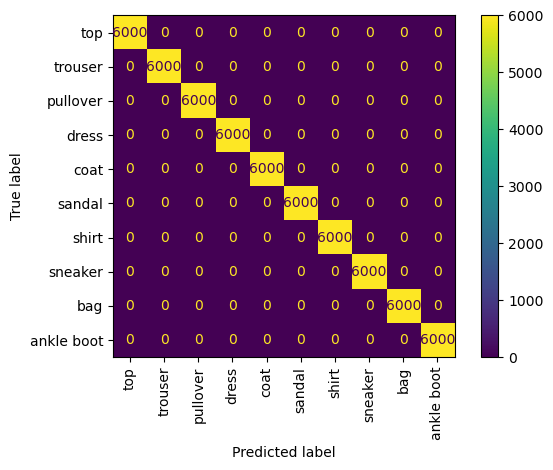

Test metrics: 
Sample count 10000
Percent Test accuracy 88
Test confusion metrics: 


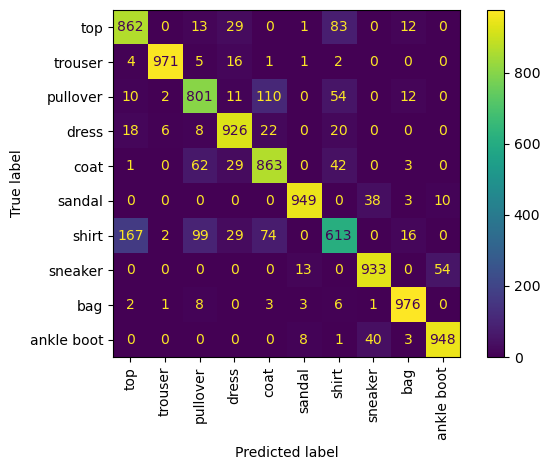

In [5]:
# Check how the training went
y_train_new = rf.predict(X_train)
y_test_new = rf.predict(x_test)

# Training Reports
make_report(gt_list=Y_train, pred_list=y_train_new, labels=labels, data_type="Training")
make_report(gt_list=y_test, pred_list=y_test_new, labels=labels, data_type="Test")

### K fold Cross Validation to check model consistency

Cross-validation evaluates performance of various machine learning models on a limited data sample. From the same sample set every time, new sample combination are used for training and remaining go for validation. 

This is achieved by dividing the set of observations into K groups/folds, of approximately equal size. In iteration one, the first fold is treated as a validation set, and the model is fit on the remaining k − 1 folds. This process of reshuffling the train and validation data is thus repeated K times. If every time, model is able to perform (have consistent accuracy, precision, recall etc.) equally well, model is said to be 'consistent'. 

Why do cross validation:
- This technique can be used to compare multiple models 
- After developing a new prediction strategy / algorithm, one can check if it generalizes for the data
- Get consistent data-splits to possibly observe sample trends, check if data reshuffle etc is needed.
- Use all parts of data for training over various iterations. Meaning samples used for training and validation will always be reshuffled. So every sample contribute to model fitting and we can still perform validation to check if model is trained properly

Training metrics:
Train sample count 48000 percent accuracy 100
Validation metrics:
Val sample count 12000 percent accuracy 88
Training metrics:
Train sample count 48000 percent accuracy 100
Validation metrics:
Val sample count 12000 percent accuracy 87
Training metrics:
Train sample count 48000 percent accuracy 100
Validation metrics:
Val sample count 12000 percent accuracy 88
Training metrics:
Train sample count 48000 percent accuracy 99
Validation metrics:
Val sample count 12000 percent accuracy 88
Training metrics:
Train sample count 48000 percent accuracy 100
Validation metrics:
Val sample count 12000 percent accuracy 88


c:\Anaconda3_64\envs\ml_python_11_venv\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Test metrics: 
Sample count 10000
Percent Test accuracy 88
Test confusion metrics: 


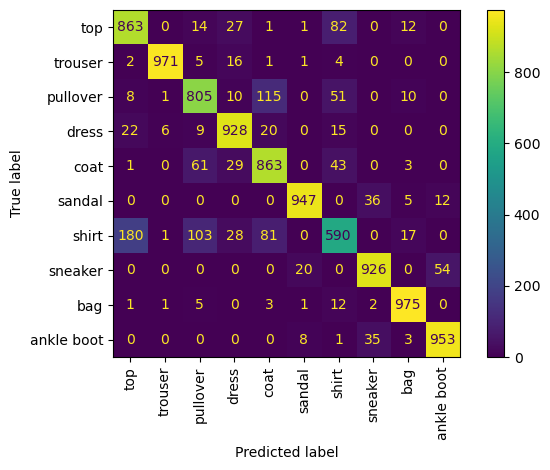

In [8]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=200, max_depth=50)

# 5 Fold Validation
sk_fold = StratifiedKFold(n_splits=5, shuffle=True)

for train_index, test_index in sk_fold.split(X_train, Y_train):
    train = [X_train.iloc[i,:] for i in train_index]
    y_train = [Y_train.iloc[i] for i in train_index]
    val = [X_train.iloc[i,:] for i in test_index]
    y_val = [Y_train.iloc[i] for i in test_index]
    
    model.fit(train, y_train)
    
    # predictions for train
    y_pred_train = model.predict(train)
    # predictions for test
    y_pred_val = model.predict(val)
    # training metrics
    print("Training metrics:")
    print("Train sample count %d percent accuracy %d" %(len(y_pred_train), 100 * accuracy_score(y_train, y_pred_train)))
    
    # training metrics
    print("Validation metrics:")
    print("Val sample count %d percent accuracy %d" %(len(y_pred_val), 100 * accuracy_score(y_val, y_pred_val)))
    

# Check how the training went
y_test_new = model.predict(x_test)

# Report
make_report(gt_list=y_test, pred_list=y_test_new, labels=labels, data_type="Test")


### Hyper-parameter Tuning

Hyper-parameters are parameters that are not directly learnt within estimators. In scikit-learn they are passed as arguments to the constructor of the estimator classes. Different ML techniques have different parameters that could be set before fitting the model.

- Neural Networks have learning rate and regularization strength
- Convolutional Neural Networks have several layers, number of filters per convolutional layer,      number of nodes in the fully connected layers, etc.
- Decision trees have the node split criteria (Gini index, information gain, etc.)
- Random Forests have the total number of trees in the forest (n_estimators), others parameters to be considered are also present (max_depth, min_samples_leaf, min_samples_split and max_features, etc.)
- Support Vector Machines (SVMs) have the type of kernel (linear, polynomial, radial basis function (RBF), etc.) along with any parameters you need to tune for the particular kernel (C, gamma, etc.)


#### Tuning Techniques
1. Exhaustive Grid Search : provided by method ***GridSearchCV( )***. User specified parameter-grid is used to gather all "possible" parameter combinations. Estimators are initialized with each combination and internally these outcomes are compared. The best combination is retained and "the most well fit" estimator instance is returned.
      ```
      param_grid_svm = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']}
                        {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']}]

      ``` 
2. Randomized Parameter Optimization : ***RandomizedSearchCV( )*** implements a randomized search over parameters, where each setting is sampled from a distribution over possible parameter values. Specifying how parameters should be sampled is done using a dictionary. Randomized search is faster than exhaustive search but possible as efficient.
      ```
      param_dist_svm = {'C': loguniform(1e0, 1e3),
                        'gamma': loguniform(1e-4, 1e-3),
                        'kernel': ['rbf'],
                        'class_weight':['balanced', None]}

      ```

      ![Alt text](data/search_cv.png)
3. Successive Halving Optimization: ***HalvingGridSearchCV( )*** and ***HalvingRandomSearchCV( )*** estimators can be used to search a parameter space using successive halving. Successive halving (SH) is like a tournament among candidate parameter combinations. SH is an iterative selection process where all candidates (the parameter combinations) are evaluated with a small amount of resources at the first iteration. Only some of these candidates are selected for the next iteration, which will be allocated more resources and more samples. For parameter tuning, the resource is typically the number of training samples, but it can also be an arbitrary numeric parameter such as n_estimators in a random forest.


      ![Alt text](data/halving_cv.png)

### When you just apply RandomSearch without scoring strategy

Results from Random Search 
The best estimator across ALL searched params: 
RandomForestClassifier(max_depth=17, n_estimators=252) 
The best score (see estimator for scoring function) across ALL searched params: 0 
The best parameters across ALL searched params: {'max_depth': 17, 'n_estimators': 252}
Test metrics: 
Sample count 10000
Percent Test accuracy 88
Test confusion metrics: 


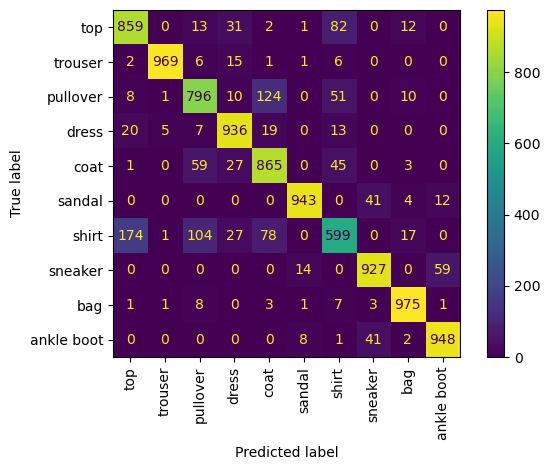

In [8]:
from scipy.stats import randint
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
        'n_estimators': randint(50,500),
        'max_depth': randint(5,20)
        }

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
model = RandomizedSearchCV(rf, 
                        param_distributions = param_dist, 
                        n_iter=5, # the number of parameter settings that are sampled (5 random params will be selected)
                        cv=3) # number of splits that is needed for cross validation

# Fit the random search object to the data
model.fit(X_train, Y_train)

print("Results from Random Search " )
print("The best estimator across ALL searched params: \n%s " % model.best_estimator_)
print("The best score (see estimator for scoring function) across ALL searched params: %d " % model.best_score_)
print("The best parameters across ALL searched params: %s" % model.best_params_)
    
# Check how the training went
y_test_new = model.predict(x_test)

# Training Reports
make_report(gt_list=y_test, pred_list=y_test_new, labels=labels, data_type="Test")

### When you apply RandomSearch with scoring strategy as accuracy

Results from Accuracy basedRandom Search 
The best estimator across ALL searched params: 
RandomForestClassifier(max_depth=15, n_estimators=84) 
The best score across ALL searched params: 0 
The best parameters across ALL searched params: {'max_depth': 15, 'n_estimators': 84}
Test metrics: 
Sample count 10000
Percent Test accuracy 87
Test confusion metrics: 


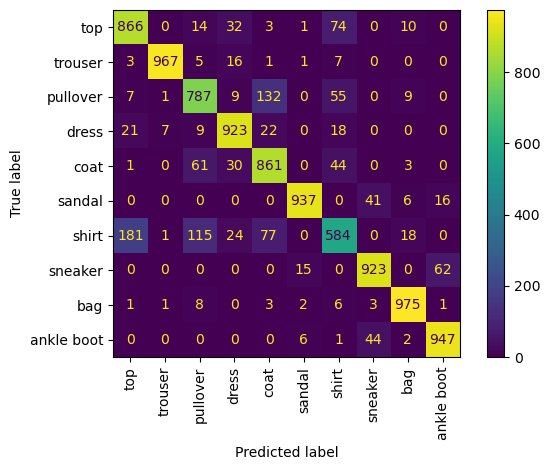

In [10]:
from scipy.stats import randint
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
        'n_estimators': randint(50,500),
        'max_depth': randint(5,20)
        }

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
model = RandomizedSearchCV(rf, 
                        param_distributions = param_dist,
                        # https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
                        scoring ='accuracy', # score my candidates based on accuracy and precision 
                        n_iter=5, # the number of parameter settings that are sampled (5 random params will be selected)
                        cv=3) # number of splits that is needed for cross validation

# Fit the random search object to the data
model.fit(X_train, Y_train)

print("Results from Accuracy basedRandom Search " )
print("The best estimator across ALL searched params: \n%s " % model.best_estimator_)
print("The best score across ALL searched params: %d " % model.best_score_)
print("The best parameters across ALL searched params: %s" % model.best_params_)
    
# Check how the training went
y_test_new = model.predict(x_test)

# Training Reports
make_report(gt_list=y_test, pred_list=y_test_new, labels=labels, data_type="Test")

### When you  apply RandomSearch with multiple scoring considerations

Results from Accuracy basedRandom Search 
The best estimator across ALL searched params: 
RandomForestClassifier(max_depth=19, n_estimators=246) 
The best score across ALL searched params: 0 
The best parameters across ALL searched params: {'max_depth': 19, 'n_estimators': 246}
Test metrics: 
Sample count 10000
Percent Test accuracy 88
Test confusion metrics: 


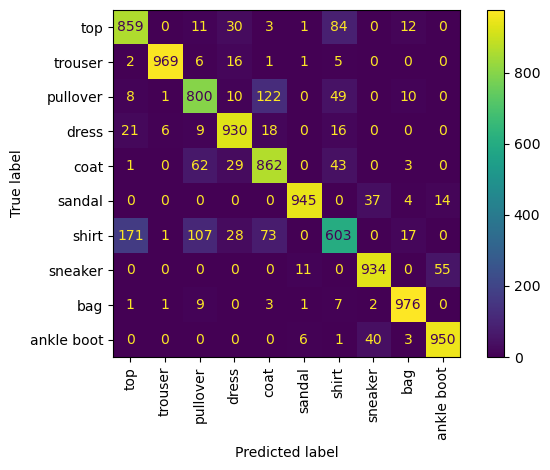

In [14]:
from scipy.stats import randint
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, recall_score

param_dist = {
        'n_estimators': randint(50,500),
        'max_depth': randint(5,20)
        }

# Create a random forest classifier
rf = RandomForestClassifier()


scorers = {
            'f1_score': make_scorer(f1_score, average='micro'),
            'recall_score': make_scorer(recall_score, average='micro'),
            'accuracy_score': 'accuracy'
          }

# Use random search to find the best hyperparameters
model = RandomizedSearchCV(rf, 
                        param_distributions = param_dist,
                        # https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
                        scoring = scorers, # score my candidates based on accuracy and recall 
                        refit='accuracy_score',
                        n_iter=5, # the number of parameter settings that are sampled (5 random params will be selected)
                        cv=3) # number of splits that is needed for cross validation

# Fit the random search object to the data
model.fit(X_train, Y_train)

print("Results from Accuracy basedRandom Search " )
print("The best estimator across ALL searched params: \n%s " % model.best_estimator_)
print("The best score across ALL searched params: %d " % model.best_score_)
print("The best parameters across ALL searched params: %s" % model.best_params_)
    
# Check how the training went
y_test_new = model.predict(x_test)

# Training Reports
make_report(gt_list=y_test, pred_list=y_test_new, labels=labels, data_type="Test")